## Exercise 9
### KMer Test Nucleotidic Composition

In [1]:
import sys
sys.path.insert(0, '/Users/Sergiomendes/Desktop/SIB/SIB/src/si')
# print(sys.path)

from sklearn.preprocessing import StandardScaler
from IO.csv_file import read_csv
from feature_extraction.k_mer import KMer
from model_selection.split import train_test_split
from linear_model.logistic_regression import LogisticRegression

In [3]:
tfbs_data = read_csv(r"/Users/Sergiomendes/Desktop/SIB/SIB/datasets/tfbs.csv",features= True,label=True)
tfbs_data.print_dataframe()

,sequence
0,CCGAGGGCTATGGTTTGGAAGTTAGAACCCTGGGGCTTCTCGCGGA...
0,GAGTTTATATGGCGCGAGCCTAGTGGTTTTTGTACTTGTTTGTCGC...
0,GATCAGTAGGGAAACAAACAGAGGGCCCAGCCACATCTAGCAGGTA...
1,GTCCACGACCGAACTCCCACCTTGACCGCAGAGGTACCACCAGAGC...
1,GGCGACCGAACTCCAACTAGAACCTGCATAACTGGCCTGGGAGATA...
...,...
0,GTCGCGCGGGTGCGGAGGATGAGTCGCAGACGCATTTATGTCGCCC...
1,GTTCGCAGCGTATTGAGTAATGTTTGACTCGACCGAACTCCATATT...
0,ACTCGCTGTCCACGTCTATTCCTAGGGGTTTTATTTCGCAAGGTGA...
1,TGCAAAGGGGCGACCGAACTCCCTTTACCGCGGAGTTATTCATAAT...


In [4]:
k_mer = KMer(k=3, alphabet="DNA")
kmer_dataset = k_mer.fit_transform(tfbs_data)
kmer_dataset.print_dataframe()

,AAA,AAC,AAT,AAG,ACA,ACC,ACT,ACG,ATA,ATC,...,GCT,GCG,GTA,GTC,GTT,GTG,GGA,GGC,GGT,GGG
0,0.00,0.02,0.00,0.02,0.02,0.04,0.00,0.00,0.00,0.00,...,0.04,0.02,0.00,0.00,0.04,0.00,0.04,0.04,0.02,0.06
0,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.02,0.00,...,0.00,0.06,0.02,0.04,0.06,0.02,0.00,0.02,0.02,0.00
0,0.04,0.04,0.00,0.00,0.06,0.00,0.00,0.00,0.00,0.04,...,0.00,0.00,0.04,0.00,0.00,0.00,0.02,0.02,0.02,0.04
1,0.00,0.02,0.00,0.00,0.00,0.10,0.02,0.02,0.00,0.00,...,0.00,0.00,0.02,0.02,0.00,0.00,0.00,0.00,0.02,0.00
1,0.00,0.08,0.00,0.00,0.00,0.04,0.06,0.00,0.04,0.00,...,0.00,0.02,0.00,0.00,0.00,0.00,0.02,0.04,0.02,0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,...,0.00,0.06,0.00,0.06,0.00,0.02,0.04,0.00,0.02,0.02
1,0.00,0.02,0.02,0.00,0.00,0.02,0.04,0.00,0.02,0.00,...,0.00,0.02,0.04,0.02,0.04,0.00,0.00,0.00,0.00,0.00
0,0.00,0.00,0.00,0.02,0.00,0.00,0.04,0.02,0.02,0.00,...,0.02,0.00,0.00,0.04,0.02,0.02,0.00,0.00,0.04,0.04
1,0.02,0.02,0.02,0.02,0.00,0.04,0.02,0.00,0.02,0.00,...,0.00,0.04,0.00,0.00,0.02,0.00,0.02,0.02,0.00,0.04


In [5]:
kmer_dataset.X = StandardScaler().fit_transform(kmer_dataset.X)
train, test = train_test_split(kmer_dataset)

lg_model = LogisticRegression(max_iter=5000)
lg_model.fit(train)
lg_model.score(test)


0.9575

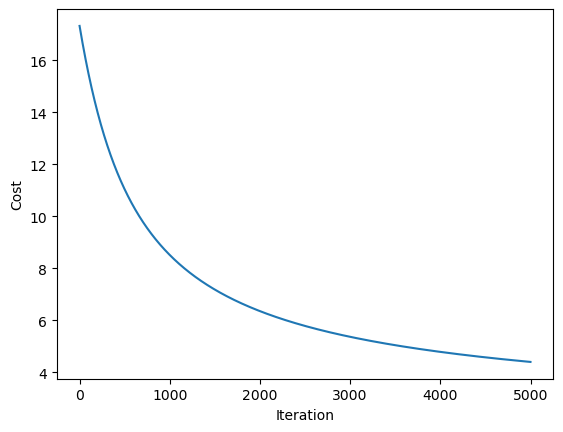

In [6]:
lg_model.plot_cost_history()

### KMer Test Peptidic Composition

In [7]:
transporter_data = read_csv(r"/Users/Sergiomendes/Desktop/SIB/SIB/datasets/transporters.csv",features= True,label=True)
transporter_data.print_dataframe()

,Sequence
1,MKKTLIALSVSAAAMATGVNAAELYNQDGTSLEMGGRAEARLSMKD...
0,MRIGVYVCHCGLNIAGVIDVSALEEMAGELEDVVLAREVQFLCSDS...
1,MELKNKKLSLWEAVSMAVGVMIGASIFSIFGVGAKIAGRNLPETFI...
0,MHLPSLSVALALVSSSLALPQAVLPENDVSSRAAAVKEAFSHAWDG...
0,MEELVGLREGFSGDPVTLQELWGPCPHIRRAIQGGLEWLKQKVFRL...
...,...
0,MKIKDALIKAYSVLKETNDEFYMEDSQILLSYVLKKDRIFLITNRE...
1,MSIATIVPENAVIGQAVNIRSMETDIVSLDDRLLQAFSGSAIATAV...
1,MTAYIQRSQCISTSLLVVLTTLVSCQIPRDRLSNIGVIVDEGKSLK...
1,MTEASEINLSDIKGPIDVNTPITNHRTALIQNYSTKPKLTYQTVFG...


In [8]:
kmer_pep = KMer(k=3, alphabet="PROT")
kmer_pep_data = kmer_pep.fit_transform(transporter_data)
kmer_pep_data.print_dataframe()

,FFF,FFL,FFI,FFM,FFV,FFS,FFP,FFT,FFA,FFY,...,GGH,GGQ,GGN,GGK,GGD,GGE,GGC,GGW,GGR,GGG
1,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.002967,0.000000,0.0,0.000000,0.0,0.0,0.002967,0.000000
0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.001261,0.0,...,0.0,0.0,0.000000,0.001261,0.0,0.000000,0.0,0.0,0.001261,0.001261
1,0.000000,0.002299,0.002299,0.0,0.000000,0.0,0.0,0.002299,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.002299,0.000000
0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.002028,0.002028
0,0.001456,0.001456,0.000000,0.0,0.001456,0.0,0.0,0.000000,0.001456,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.003509,0.0,0.0,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.001996,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000


In [9]:
kmer_pep_data.X = StandardScaler().fit_transform(kmer_pep_data.X)
train, test = train_test_split(kmer_pep_data)

lg_model_pep = LogisticRegression(max_iter=5000)
lg_model_pep.fit(train)
lg_model_pep.score(test)

0.7686567164179104

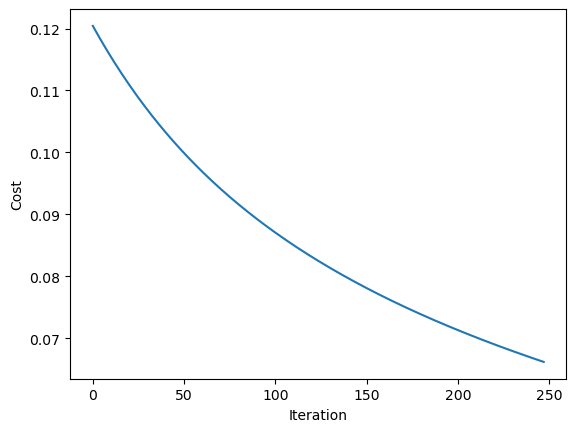

In [10]:
lg_model_pep.plot_cost_history()
